In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
import plotly.express as px


In [47]:
youtube_stats_df = pd.read_csv("/Users/denisebby/Desktop/youtube_data/videos-stats.csv", index_col = False)
youtube_comments_df = pd.read_csv("/Users/denisebby/Desktop/youtube_data/comments.csv", index_col = False)

In [48]:
# get rid of unnecessary column
youtube_stats_df.drop("Unnamed: 0", axis = 1, inplace = True)
youtube_comments_df.drop("Unnamed: 0", axis = 1, inplace = True)

In [52]:
# remove videos with duplicate records
duplicate_video_records = youtube_stats_df.groupby(by=["Video ID"])["Video ID"].size().reset_index(name="counts").query("counts > 1")
duplicates = list(duplicate_video_records["Video ID"])
youtube_stats_df = youtube_stats_df.query(f"~`Video ID`.isin({duplicates})")

In [106]:
# add number of comments to main df
num_comments_df = youtube_comments_df.groupby(by=["Video ID"]).size().reset_index(name="num_comments_we_have")
youtube_stats_df = youtube_stats_df.merge(num_comments_df, on = ["Video ID"], how = "left")

In [100]:
# convert publish date from object to datetime, store columns for year, month, day
youtube_stats_df["publish_date"] = pd.to_datetime(youtube_stats_df["Published At"])
youtube_stats_df["publish_year"] = youtube_stats_df["publish_date"].dt.year
youtube_stats_df["publish_month"] = youtube_stats_df["publish_date"].dt.month 
youtube_stats_df["publish_day"] = youtube_stats_df["publish_date"].dt.day



In [ ]:
# 

# Insights

I see 1,869 videos in this dataset.
There are 24 videos with duplicate records around there being multiple key words for the same video. For instance, for an ASMR Gaming video, there is an entry with keyword "asmr" and another with keyword "gaming". Sometimes, the youtube stats don't match up for the duplicate records. I just manually removed cases. 
So now I have 1,857 videos.

For 95% of the videos, we have 10 selected comments with text. Re-reading the kaggle description, only the top 10 most relevant comments were chosen.

Almost 90% of the keywords have at least 40 videos. The keyword "mathchemistry" has the least number of videos with 15 videos.

There are 41 unique key words. 

There remains cleaning to be done. 

# EDA

In [107]:
display(youtube_stats_df.shape)
display(youtube_stats_df.dtypes)
display(youtube_stats_df.sample(5))

(1857, 12)

Title                           object
Video ID                        object
Published At                    object
Keyword                         object
Likes                          float64
Comments                       float64
Views                          float64
publish_date            datetime64[ns]
publish_year                     int64
publish_month                    int64
publish_day                      int64
num_comments_we_have             int64
dtype: object

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,publish_date,publish_year,publish_month,publish_day,num_comments_we_have
1058,Azadi - A Tribute To India&#39;s Great Freedom...,ttHU25alu8A,2022-08-23,reaction,2967.0,565.0,63886.0,2022-08-23,2022,8,23,10
1829,MarI/O - Machine Learning for Video Games,qv6UVOQ0F44,2015-06-13,machine learning,29980.0,897.0,1167616.0,2015-06-13,2015,6,13,10
557,www.google.com search,e4con87R_Dk,2018-07-11,google,8383.0,773.0,9826182.0,2018-07-11,2018,7,11,10
604,TOP 7 Interview Questions and Answers (PASS GU...,umQKkcBPL08,2018-06-10,interview,130176.0,8669.0,5923959.0,2018-06-10,2018,6,10,10
1054,Reaction &quot;Quên Anh Đi&quot; - &quot;Waiti...,isgtqJAEba8,2022-08-24,reaction,5035.0,564.0,131760.0,2022-08-24,2022,8,24,10


In [165]:
youtube_stats_df.to_csv("youtube_stats_clean.csv", index = False)

In [17]:
display(youtube_comments_df.dtypes)
display(youtube_comments_df.sample(5))

Video ID      object
Comment       object
Likes        float64
Sentiment    float64
dtype: object

,Video ID,Comment,Likes,Sentiment
14637,O5nskjZ_GoI,Ahhh I am super excited to follow this series!...,18.0,2.0
4786,vK00aD8FmsE,Great job,0.0,2.0
4054,2qXhKXCILLg,What an amazing hit!,2.0,2.0
7938,llfQoYue0Yw,"''HE'S A HACKER!'' yes, a man in a sinking boa...",416.0,0.0
12663,JeTkMdw6RK8,Now I get why he makes only a few videos per m...,3.0,2.0


In [169]:
keyword = "tech"
fig = px.scatter(youtube_stats_df.query(f"Keyword == '{keyword}'"), x = "publish_date", y = "Views", color = "Likes", size = "Comments",
        hover_data = ["Title"], template = "plotly_white", color_continuous_scale="portland")
fig.update_traces(marker = dict(line=dict(width=2, color = "Black")))
fig.update_xaxes(title = "Publish Date")
fig.update_layout(title = f"<b>Youtube Stats: Keyword = '{keyword}'</b><br>Size=# comments, Color = # likes")

In [163]:
youtube_stats_df.shape

(1857, 12)

In [164]:
youtube_stats_df = youtube_stats_df.dropna()

In [27]:
youtube_stats_df.shape

(1881, 8)

In [99]:
youtube_stats_df = youtube_stats_df.publish_date.dt.day

0       23
1       24
2       23
3        8
4        5
        ..
1852    14
1853     8
1854    20
1855    11
1856    30
Name: publish_date, Length: 1857, dtype: int64

In [39]:
youtube_stats_df.groupby(by=["Video ID"])["Video ID"].size().reset_index(name="counts").query("counts > 1")

,Video ID,counts
111,2FYvHn12pOQ,2
176,4mgePWWCAmA,2
201,5q87K1WaoFI,2
249,7eh4d6sabA0,2
281,96mrgd8-3yE,2
627,LeC5yJq4tsI,2
791,R-R0KrXvWbc,2
804,RFMi3v0TXP8,2
945,WBK2_lD7KGA,2
1047,ZgeorpjGJC0,2


Text(0.5, 1.0, 'Distribution of Keyword # Videos')

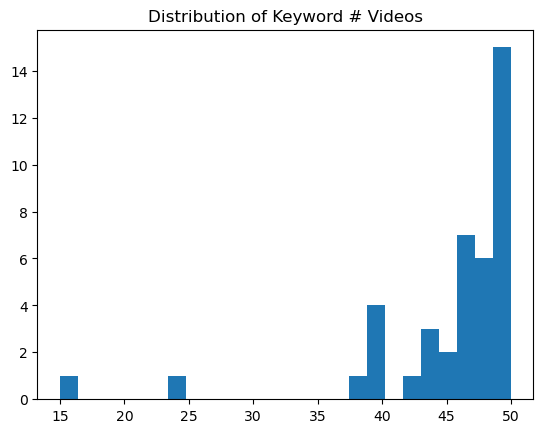

In [87]:
fig, ax = plt.subplots()

ax.hist(youtube_stats_df.groupby(by=["Keyword"]).size().reset_index(name="keyword_freq").keyword_freq, bins = 25)
ax.set_title("Distribution of Keyword # Videos")

In [109]:
display(youtube_stats_df.groupby(by=["Keyword"]).size().reset_index(name="keyword_freq").sort_values(by=["keyword_freq"], ascending = False).head(5))
display(youtube_stats_df.groupby(by=["Keyword"]).size().reset_index(name="keyword_freq").sort_values(by=["keyword_freq"], ascending = True).head(5))

,Keyword,keyword_freq
20,interview,50
7,cnn,50
24,marvel,50
15,game development,50
28,mrbeast,50


,Keyword,keyword_freq
25,mathchemistry,15
12,education,24
0,animals,38
13,finance,39
31,news,39


In [112]:
tmp = youtube_stats_df.groupby(by=["Keyword"]).size().reset_index(name="keyword_freq").sort_values(by=["keyword_freq"], ascending = False)
tmp.query("keyword_freq >= 40").shape[0]/ tmp.shape[0]

0.8780487804878049

In [40]:
duplicate_video_records = youtube_stats_df.groupby(by=["Video ID"])["Video ID"].size().reset_index(name="counts").query("counts > 1")

In [50]:
duplicates = list(duplicate_video_records["Video ID"])

In [43]:
youtube_stats_df.merge(duplicate_video_records, on = ["Video ID"], how = "inner").sort_values(by=["Video ID"])

# remove indexes 17, 0, 19,18, 22,23,21, 8, 7, 14, 3, 12, 11, 4

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,counts
17,Vikram Vedha Movie Teaser Review | KRK | #krkr...,2FYvHn12pOQ,2022-08-24,movies,-1.0,105.0,1541874.0,2
16,Vikram Vedha Movie Teaser Review | KRK | #krkr...,2FYvHn12pOQ,2022-08-24,reaction,29728.0,8832.0,405791.0,2
0,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0,2
1,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,gaming,63825.0,3338.0,1564007.0,2
19,Computer Scientist Explains Machine Learning i...,5q87K1WaoFI,2021-08-18,machine learning,15137.0,181.0,906372.0,2
18,Computer Scientist Explains Machine Learning i...,5q87K1WaoFI,2021-08-18,computer science,42940.0,1735.0,1407319.0,2
22,Python Machine Learning Tutorial (Data Science),7eh4d6sabA0,2020-09-17,data science,7555.0,442.0,295344.0,2
23,Python Machine Learning Tutorial (Data Science),7eh4d6sabA0,2020-09-17,machine learning,1237.0,16.0,32605.0,2
20,🚨 DÉPÊCHEZ-VOUS 🚨 Ces PROMOS disparaissent bie...,96mrgd8-3yE,2022-08-24,nintendo,406.0,57.0,13184.0,2
21,🚨 DÉPÊCHEZ-VOUS 🚨 Ces PROMOS disparaissent bie...,96mrgd8-3yE,2022-08-24,xbox,406.0,57.0,13184.0,2


In [64]:
num_comments_df = youtube_comments_df.groupby(by=["Video ID"]).size().reset_index(name="num_comments")

In [69]:
youtube_stats_df = youtube_stats_df.merge(num_comments_df, on = ["Video ID"], how = "left")

In [70]:
youtube_stats_df.query("num_comments == 10").shape[0]/ youtube_stats_df.shape[0]

0.946149703823371

In [72]:
youtube_stats_df.query("num_comments < 10")

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,num_comments
24,OnePlus 10R vs 10T | Unboxing &amp; Comparison,Ql1-RZ2FUrc,2022-08-24,tech,970.0,207.0,23175.0,9
32,15 Emerging Technologies That Will Change Our ...,My2Tr3k1liw,2022-05-14,tech,3494.0,136.0,589007.0,9
44,Futurum Research&#39;s Daniel Newman breaks do...,-VVLmBXHvL8,2022-08-24,tech,24.0,45.0,3461.0,5
65,Breaking News: Jharkhand के CM Hemant Soren के...,Sdm1WsGGU0w,2022-08-24,news,129.0,7.0,10642.0,3
66,Zee Hindustan Live News: Attack On Nitish Kuma...,XHKojSQxTs0,2022-08-24,news,1288.0,3.0,172513.0,3
...,...,...,...,...,...,...,...,...
1699,Lifetime Movies 2022 #LMN Movies | New Lifetim...,WC2LFmU8CNE,2022-08-21,movies,179555.0,6907.0,65067408.0,6
1702,New Lifetime Movies (2022) #LMN Movies | Based...,8gj6deh-fWU,2022-08-23,movies,280080.0,7414.0,52046148.0,1
1709,Mistake: Forgive Only Once | Exclusive English...,_5EkSF8-8o0,2022-01-02,movies,700.0,16.0,18302.0,9
1750,How Data Science Helps Small Businesses,Q_6o8l5aEWg,2022-08-24,data science,3759.0,67.0,151345.0,2


In [54]:
youtube_comments_df.sample(10)

,Video ID,Comment,Likes,Sentiment
708,lHDn25SLgdk,This is terrifying. A couple days ago I was ju...,36.0,0.0
10232,erCx9kkDO-k,I am Tamil. I love the R.Madhavan/VJS movie. B...,283.0,2.0
5611,n2RNcPRtAiY,Such a \nhumble guy. The way he approaches to ...,922.0,2.0
12317,GAOHbxgVpcg,Taking mine after tomorrow 😭😭😭😭haven't even pr...,26.0,0.0
1480,U7bNzl0HepU,I love how the cleanup crew beats the medical ...,399.0,2.0
164,PKATJiyz0iI,Anyone else notice how much the WYN Bullet res...,2.0,1.0
8349,xv_5rueuQ4c,I love when you post a lot!!,1.0,2.0
8856,UVLw1mxe0QI,"Sarah jesteś niesamowita, przepiękny głos, jes...",120.0,1.0
2071,casK0pXZ5sc,In the words of the late Alan Watts. “The mean...,680.0,1.0
4569,UApgiHQKemk,What a coincidence! I was just playing the sco...,2.0,2.0


Text(0.5, 1.0, 'Distribution of # Comments We Have')

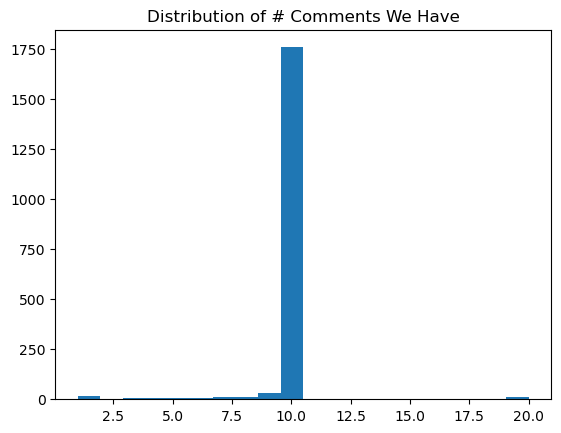

In [104]:
fig, ax = plt.subplots()

ax.hist(youtube_comments_df.groupby(by=["Video ID"]).size().reset_index(name="num_comments").num_comments, bins = 20)
ax.set_title("Distribution of # Comments We Have")

In [154]:
df = pd.read_csv("youtube_stats_clean.csv")

In [158]:
df.Keyword.nunique()

41

In [157]:
sorted(df.Keyword.unique())

['animals',
 'apple',
 'asmr',
 'bed',
 'biology',
 'business',
 'chess',
 'cnn',
 'computer science',
 'crypto',
 'cubes',
 'data science',
 'education',
 'finance',
 'food',
 'game development',
 'gaming',
 'google',
 'history',
 'how-to',
 'interview',
 'literature',
 'lofi',
 'machine learning',
 'marvel',
 'mathchemistry',
 'minecraft',
 'movies',
 'mrbeast',
 'mukbang',
 'music',
 'news',
 'nintendo',
 'physics',
 'reaction',
 'sat',
 'sports',
 'tech',
 'trolling',
 'tutorial',
 'xbox']

# Loading data from GCS bucket

In [172]:
# I had to install fsspec and gcsfs
data_df = pd.read_csv("gs://gcf-sources-134756275535-us-central1/youtube_stats_clean.csv")

In [173]:
data_df.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,publish_date,publish_year,publish_month,publish_day,num_comments_we_have
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,2022-08-23,2022,8,23,10
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0,2022-08-24,2022,8,24,10
2,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0,2022-08-23,2022,8,23,10
3,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0,2022-08-08,2022,8,8,10
4,Brewmaster Answers Beer Questions From Twitter...,18fwz9Itbvo,2021-11-05,tech,33570.0,1643.0,943119.0,2021-11-05,2021,11,5,10
